In [1]:
import tensorflow as tf
import tensorflow.keras as keras
tf.__version__, keras.__version__

('2.3.2', '2.4.0')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [3]:
data = pd.read_csv('./dataset/wine.csv', header=None)
print(data.head())

     0     1     2    3      4     5     6       7     8     9    10  11  12
0   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4   5   1
1   7.8  0.88  0.00  2.6  0.098  25.0  67.0  0.9968  3.20  0.68  9.8   5   1
2   7.8  0.76  0.04  2.3  0.092  15.0  54.0  0.9970  3.26  0.65  9.8   5   1
3  11.2  0.28  0.56  1.9  0.075  17.0  60.0  0.9980  3.16  0.58  9.8   6   1
4   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4   5   1


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


In [5]:
X = data.iloc[:, 0:12].values
y = data.iloc[:, 12].values

print(X[:5])
print(y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 5.000e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00 5.000e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00 5.000e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00 6.000e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 5.000e+00]]
[1 1 1 1 1]


In [6]:
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 파일 경로가 없으면 만들고
model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelName = model_dir + 'model_day4.h5'
# val_loss를 모니터하면서 더 나아지면! 저장해라
checkpointer = ModelCheckpoint(filepath=modelName, monitor='val_loss', verbose = 1, save_best_only=True)

# 학습의 자동중단! 30번동안 나아지지 않으면 stop!
early_stop = EarlyStopping(monitor='val_loss', patience=30)

# validation_split 은 x_train, y_train에서도 0.2 만큼 데이터를 나누어서 중간중간 점검하면서 훈련해라!

# 그리고 epochs를 늘려셔 확인!
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=150, callbacks=[checkpointer, early_stop])

Epoch 1/500
23/25 [==========================>...] - ETA: 0s - loss: 0.3770 - accuracy: 0.8429
Epoch 00001: val_loss improved from inf to 0.26878, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 16ms/step - loss: 0.3738 - accuracy: 0.8458 - val_loss: 0.2688 - val_accuracy: 0.9253
Epoch 2/500
19/25 [=====================>........] - ETA: 0s - loss: 0.2586 - accuracy: 0.9165
Epoch 00002: val_loss improved from 0.26878 to 0.24710, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 7ms/step - loss: 0.2546 - accuracy: 0.9189 - val_loss: 0.2471 - val_accuracy: 0.9253
Epoch 3/500
23/25 [==========================>...] - ETA: 0s - loss: 0.2258 - accuracy: 0.9281
Epoch 00003: val_loss improved from 0.24710 to 0.21993, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 5ms/step - loss: 0.2275 - accuracy: 0.9263 - val_loss: 0.2199 - val_accuracy: 0.9374
Epoch 4/500
24/25 [===========================>..

Epoch 27/500
 1/25 [>.............................] - ETA: 0s - loss: 0.1839 - accuracy: 0.9200
Epoch 00027: val_loss improved from 0.10083 to 0.09766, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 6ms/step - loss: 0.1083 - accuracy: 0.9612 - val_loss: 0.0977 - val_accuracy: 0.9692
Epoch 28/500
25/25 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9662
Epoch 00028: val_loss did not improve from 0.09766
25/25 [==============================] - 0s 4ms/step - loss: 0.1059 - accuracy: 0.9662 - val_loss: 0.1205 - val_accuracy: 0.9648
Epoch 29/500
 1/25 [>.............................] - ETA: 0s - loss: 0.1112 - accuracy: 0.9733
Epoch 00029: val_loss improved from 0.09766 to 0.09425, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 6ms/step - loss: 0.1127 - accuracy: 0.9629 - val_loss: 0.0942 - val_accuracy: 0.9736
Epoch 30/500
 1/25 [>.............................] - ETA: 0s - loss: 0.1260 - accurac

17/25 [===================>..........] - ETA: 0s - loss: 0.0580 - accuracy: 0.9824
Epoch 00054: val_loss improved from 0.05136 to 0.05124, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 8ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.0512 - val_accuracy: 0.9879
Epoch 55/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0664 - accuracy: 0.9933
Epoch 00055: val_loss did not improve from 0.05124
25/25 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9816 - val_loss: 0.0557 - val_accuracy: 0.9780
Epoch 56/500
18/25 [====================>.........] - ETA: 0s - loss: 0.0709 - accuracy: 0.9800
Epoch 00056: val_loss improved from 0.05124 to 0.04625, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 6ms/step - loss: 0.0653 - accuracy: 0.9819 - val_loss: 0.0463 - val_accuracy: 0.9824
Epoch 57/500
 1/25 [>.............................] - ETA: 0s - loss: 0.1064 - accuracy: 0.9667
Epo

16/25 [==================>...........] - ETA: 0s - loss: 0.0520 - accuracy: 0.9837
Epoch 00082: val_loss did not improve from 0.03461
25/25 [==============================] - 0s 5ms/step - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.0392 - val_accuracy: 0.9824
Epoch 83/500
18/25 [====================>.........] - ETA: 0s - loss: 0.0595 - accuracy: 0.9833
Epoch 00083: val_loss did not improve from 0.03461
25/25 [==============================] - 0s 5ms/step - loss: 0.0598 - accuracy: 0.9821 - val_loss: 0.0472 - val_accuracy: 0.9802
Epoch 84/500
22/25 [=========================>....] - ETA: 0s - loss: 0.0522 - accuracy: 0.9836
Epoch 00084: val_loss did not improve from 0.03461
25/25 [==============================] - 0s 5ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 85/500
20/25 [=======================>......] - ETA: 0s - loss: 0.0404 - accuracy: 0.9870
Epoch 00085: val_loss did not improve from 0.03461
25/25 [==============================]

Epoch 00110: val_loss did not improve from 0.02975
25/25 [==============================] - 0s 5ms/step - loss: 0.0506 - accuracy: 0.9871 - val_loss: 0.0310 - val_accuracy: 0.9945
Epoch 111/500
24/25 [===========================>..] - ETA: 0s - loss: 0.0458 - accuracy: 0.9883
Epoch 00111: val_loss did not improve from 0.02975
25/25 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9885 - val_loss: 0.0388 - val_accuracy: 0.9813
Epoch 112/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0475 - accuracy: 0.9933
Epoch 00112: val_loss improved from 0.02975 to 0.02941, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 5ms/step - loss: 0.0494 - accuracy: 0.9868 - val_loss: 0.0294 - val_accuracy: 0.9956
Epoch 113/500
21/25 [========================>.....] - ETA: 0s - loss: 0.0400 - accuracy: 0.9898
Epoch 00113: val_loss did not improve from 0.02941
25/25 [==============================] - 0s 5ms/step - loss: 0.0430 - accur

Epoch 140/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0443 - accuracy: 0.9867
Epoch 00140: val_loss did not improve from 0.02889
25/25 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9904 - val_loss: 0.0291 - val_accuracy: 0.9934
Epoch 141/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0211 - accuracy: 1.0000
Epoch 00141: val_loss improved from 0.02889 to 0.02833, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 0.9893 - val_loss: 0.0283 - val_accuracy: 0.9945
Epoch 142/500
24/25 [===========================>..] - ETA: 0s - loss: 0.0426 - accuracy: 0.9892
Epoch 00142: val_loss did not improve from 0.02833
25/25 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9893 - val_loss: 0.0293 - val_accuracy: 0.9901
Epoch 143/500
25/25 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9876
Epoch 00143: val_loss did not

Epoch 169/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0168 - accuracy: 1.0000
Epoch 00169: val_loss did not improve from 0.02550
25/25 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.9896 - val_loss: 0.0297 - val_accuracy: 0.9879
Epoch 170/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0244 - accuracy: 0.9933
Epoch 00170: val_loss did not improve from 0.02550
25/25 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9901 - val_loss: 0.0306 - val_accuracy: 0.9879
Epoch 171/500
21/25 [========================>.....] - ETA: 0s - loss: 0.0316 - accuracy: 0.9898
Epoch 00171: val_loss improved from 0.02550 to 0.02415, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0241 - val_accuracy: 0.9945
Epoch 172/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0156 - accuracy: 1.0000
Epoch 00172: val_loss did not

 1/25 [>.............................] - ETA: 0s - loss: 0.0448 - accuracy: 0.9867
Epoch 00198: val_loss did not improve from 0.02314
25/25 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9909 - val_loss: 0.0465 - val_accuracy: 0.9824
Epoch 199/500
22/25 [=========================>....] - ETA: 0s - loss: 0.0414 - accuracy: 0.9891
Epoch 00199: val_loss improved from 0.02314 to 0.02233, saving model to ./model\model_day4.h5
25/25 [==============================] - 0s 6ms/step - loss: 0.0400 - accuracy: 0.9898 - val_loss: 0.0223 - val_accuracy: 0.9956
Epoch 200/500
15/25 [=================>............] - ETA: 0s - loss: 0.0367 - accuracy: 0.9920
Epoch 00200: val_loss did not improve from 0.02233
25/25 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9907 - val_loss: 0.0239 - val_accuracy: 0.9945
Epoch 201/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0436 - accuracy: 0.9867
Epoch 00201: val_loss did not improve from 

 1/25 [>.............................] - ETA: 0s - loss: 0.0242 - accuracy: 0.9933
Epoch 00227: val_loss did not improve from 0.02186
25/25 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9893 - val_loss: 0.0357 - val_accuracy: 0.9846
Epoch 228/500
23/25 [==========================>...] - ETA: 0s - loss: 0.0376 - accuracy: 0.9907
Epoch 00228: val_loss did not improve from 0.02186
25/25 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9904 - val_loss: 0.0463 - val_accuracy: 0.9835
Epoch 229/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0508 - accuracy: 0.9867
Epoch 00229: val_loss did not improve from 0.02186
25/25 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9879 - val_loss: 0.0261 - val_accuracy: 0.9901
Epoch 230/500
 1/25 [>.............................] - ETA: 0s - loss: 0.0787 - accuracy: 0.9733
Epoch 00230: val_loss did not improve from 0.02186
25/25 [============================

In [7]:
print("정확도 : %.4f " % model.evaluate(X_test, y_test)[1])

61/61 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9872
정확도 : 0.9872 


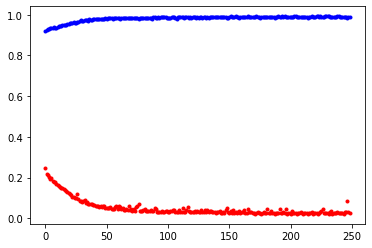

In [9]:
y_vloss = history.history['val_loss'][1:]

y_acc = history.history['accuracy'][1:]

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c='red', markersize=3)
plt.plot(x_len, y_acc, "o", c='blue', markersize=3)

plt.show()